# Pymaceuticals Inc.
---

### Analysis
Capomulin and Ramicane have the lowest means tumor volume which could indicate that they are
the best treatment options. The final scatter plot suggests that the weight of the mouse does
play a role in the size of the tumor. The correlation is poitive which means that a heavier 
mouse most likely has a heavier tumor. There are low outliers in the Capomulin and Ramicane 
datasets. So, it is possible that those two treatments may not be quite as effective as they seem.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='right')


# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
num_mice=merged_df["Mouse ID"].nunique()
print(num_mice)


249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_id=duplicates["Mouse ID"].drop_duplicates()
duplicate_mouse_id


107    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates = merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_id="g989"
clean_df=merged_df[merged_df["Mouse ID"] !=remove_id]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_num_mice=clean_df["Mouse ID"].nunique()
clean_num_mice


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err='sem'
)
summary_stats


,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
print("Tumor Volume (mm3)")
display(summary_statistics)

Tumor Volume (mm3)


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

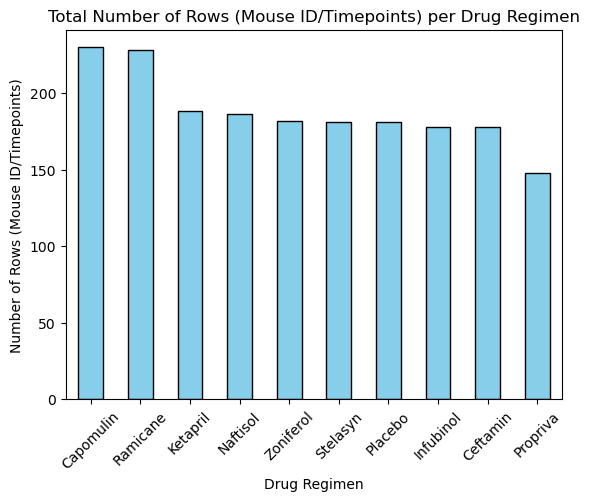

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df["Drug Regimen"].value_counts()
regimen_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.xticks(rotation=45)
plt.show()

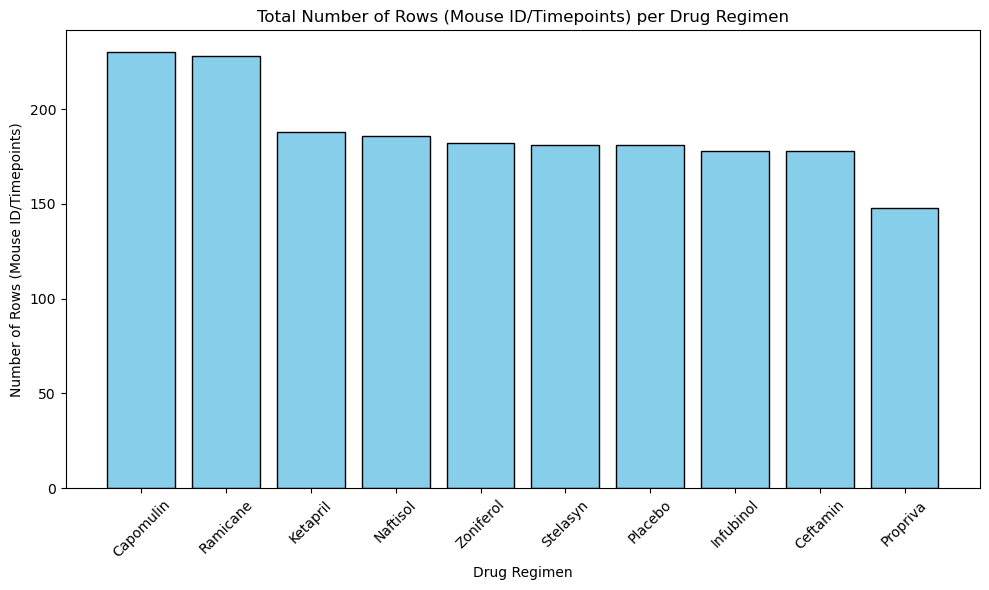

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(regimen_counts.index, regimen_counts.values, color='skyblue', edgecolor='black')
plt.title("Total Number of Rows (Mouse ID/Timepoints) per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout for better fitting
plt.show()

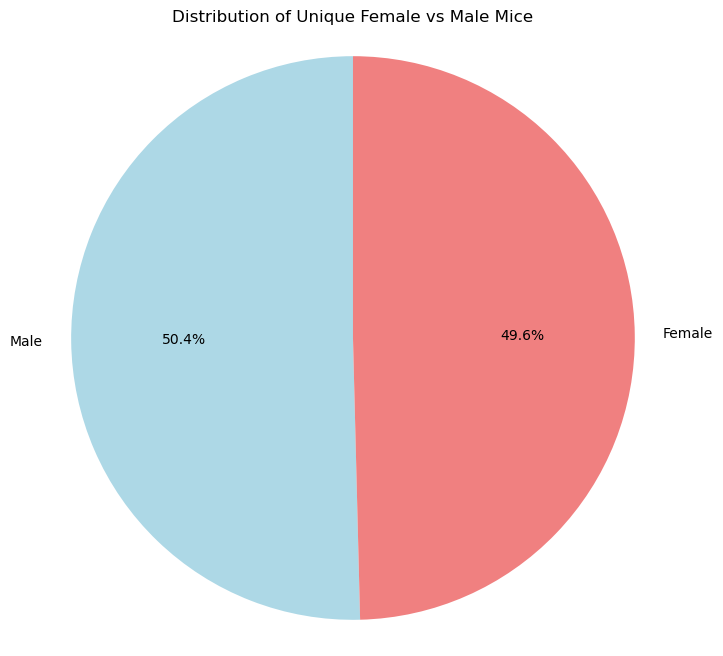

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('')  
plt.axis('equal')  
plt.show()

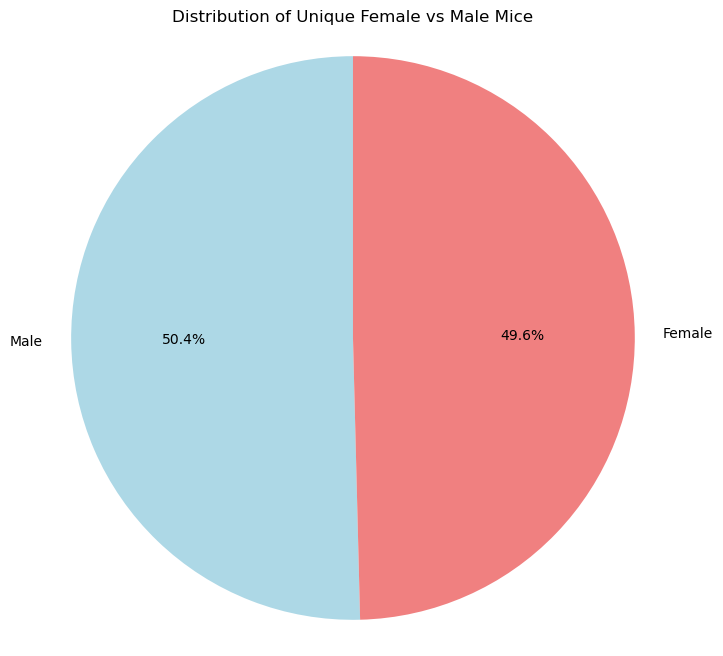

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_df[['Mouse ID', 'Sex']].drop_duplicates()
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Unique Female vs Male Mice')
plt.axis('equal')  
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = filtered_df.groupby('Mouse ID').agg({'Timepoint': 'max'}).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, filtered_df, on=['Mouse ID', 'Timepoint'])
final_tumor_volume_df = final_tumor_volume_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = clean_df[clean_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volumes)

    # add subset
    Q1 = tumor_volumes.quantile(0.25)
    Q3 = tumor_volumes.quantile(0.75)
    IQR = Q3 - Q1

    # Determine outliers using upper and lower bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    potential_outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment}'s potential outliers:\n{potential_outliers}\n")

Capomulin's potential outliers:
1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers:
1814    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



<function matplotlib.pyplot.show(close=None, block=None)>

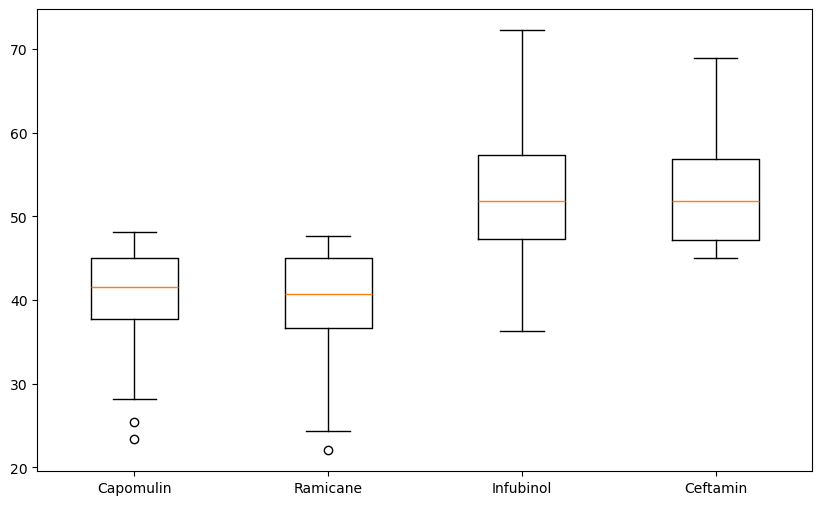

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, tick_labels=treatments) 
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

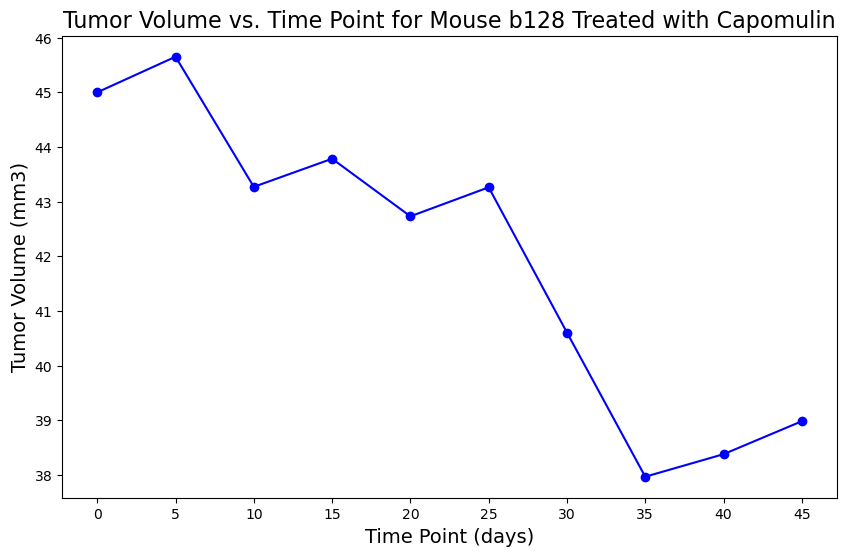

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
actual_mouse_id = clean_df.iloc[0]['Mouse ID']
mouse_data = clean_df[(clean_df['Mouse ID'] == actual_mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label=actual_mouse_id)
plt.title(f'Tumor Volume vs. Time Point for Mouse {actual_mouse_id} Treated with Capomulin', fontsize=16)
plt.xlabel('Time Point (days)', fontsize=14)
plt.ylabel('Tumor Volume (mm3)', fontsize=14)
plt.xticks(mouse_data['Timepoint'])
plt.show

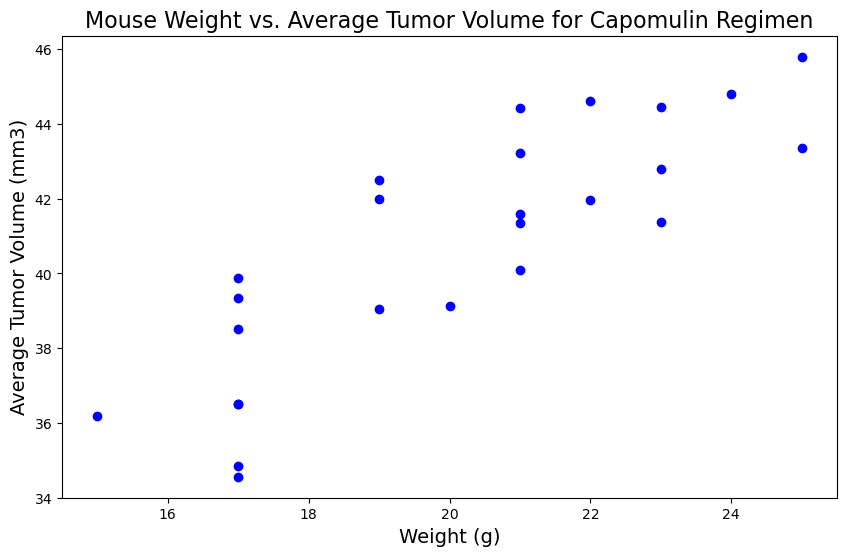

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates().set_index('Mouse ID')
merged_data = mouse_weights.join(avg_tumor_volume)
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontsize=16)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.show()


## Correlation and Regression

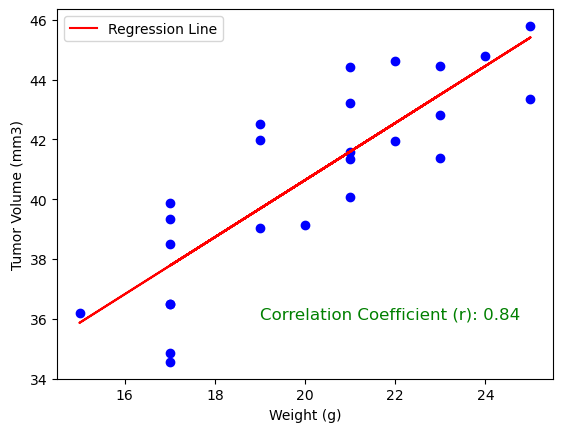

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b')
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
regression_line = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], regression_line, color='r', label='Regression Line')
plt.text(19, 36, f'Correlation Coefficient (r): {r_value:.2f}', fontsize=12, color='green')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()